In [5]:
a= {'/News/Politics': [26], '/News': [5], '/Law & Government': [4], '/Arts & Entertainment': [3], '/Law & Government/Government': [2], '/Sensitive Subjects': [2], '/Law & Government/Public Safety': [1], '/Law & Government/Legal/Legal Education': [1], '/Jobs & Education/Education/Colleges & Universities': [1], '/Law & Government/Public Safety/Law Enforcement': [1], '/Online Communities/Social Networks': [1], '/Online Communities/Blogging Resources & Services': [1], '/Law & Government/Legal': [1], '/Autos & Vehicles/Vehicle Codes & Driving Laws': [1], '/Autos & Vehicles/Motor Vehicles (By Type)/Hybrid & Alternative Vehicles': [1], '/People & Society/Social Issues & Advocacy': [1], '/Law & Government/Legal/Legal Services': [1]}
import pandas as pd
b = pd.DataFrame.from_dict(a)

In [11]:
b = b.transpose()


,0
/News/Politics,26
/News,5
/Law & Government,4
/Arts & Entertainment,3
/Law & Government/Government,2
/Sensitive Subjects,2
/Law & Government/Public Safety,1
/Law & Government/Legal/Legal Education,1
/Jobs & Education/Education/Colleges & Universities,1
/Law & Government/Public Safety/Law Enforcement,1


<AxesSubplot:ylabel='0'>

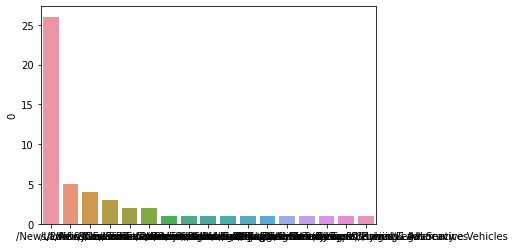

In [18]:
import seaborn as sns
sns.barplot(x=b.index, y=b[0])